In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("loan_data.csv")
di = pd.read_csv("input.csv")
do = pd.read_csv("output.csv")

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
di.head()

,1,0.1189,829.1,11.35040654,19.48,737,5639.958333,28854,52.1,0,0.1,0.2,0.3,0.4,1.1,0.5,0.6,0.7
0,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0
1,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0
2,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0
3,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0
4,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,1,0,0,0,0


In [6]:
do.head()

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [7]:
df.shape

(9578, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [26]:
df.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [10]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [11]:
df.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


<AxesSubplot:>

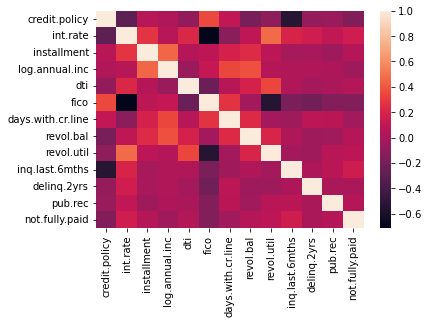

In [13]:
sns.heatmap(df.corr())

In [33]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [41]:
 dt = df.drop(labels = ["revol.util","inq.last.6mths"],axis = 1)

In [42]:
dt.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,1,0,0


<AxesSubplot:>

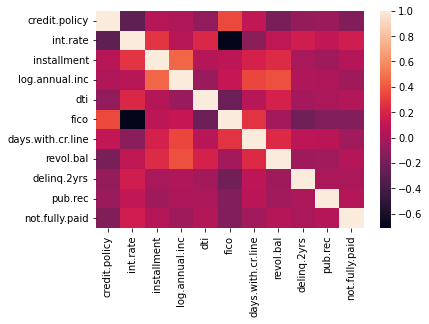

In [43]:
sns.heatmap(dt.corr())

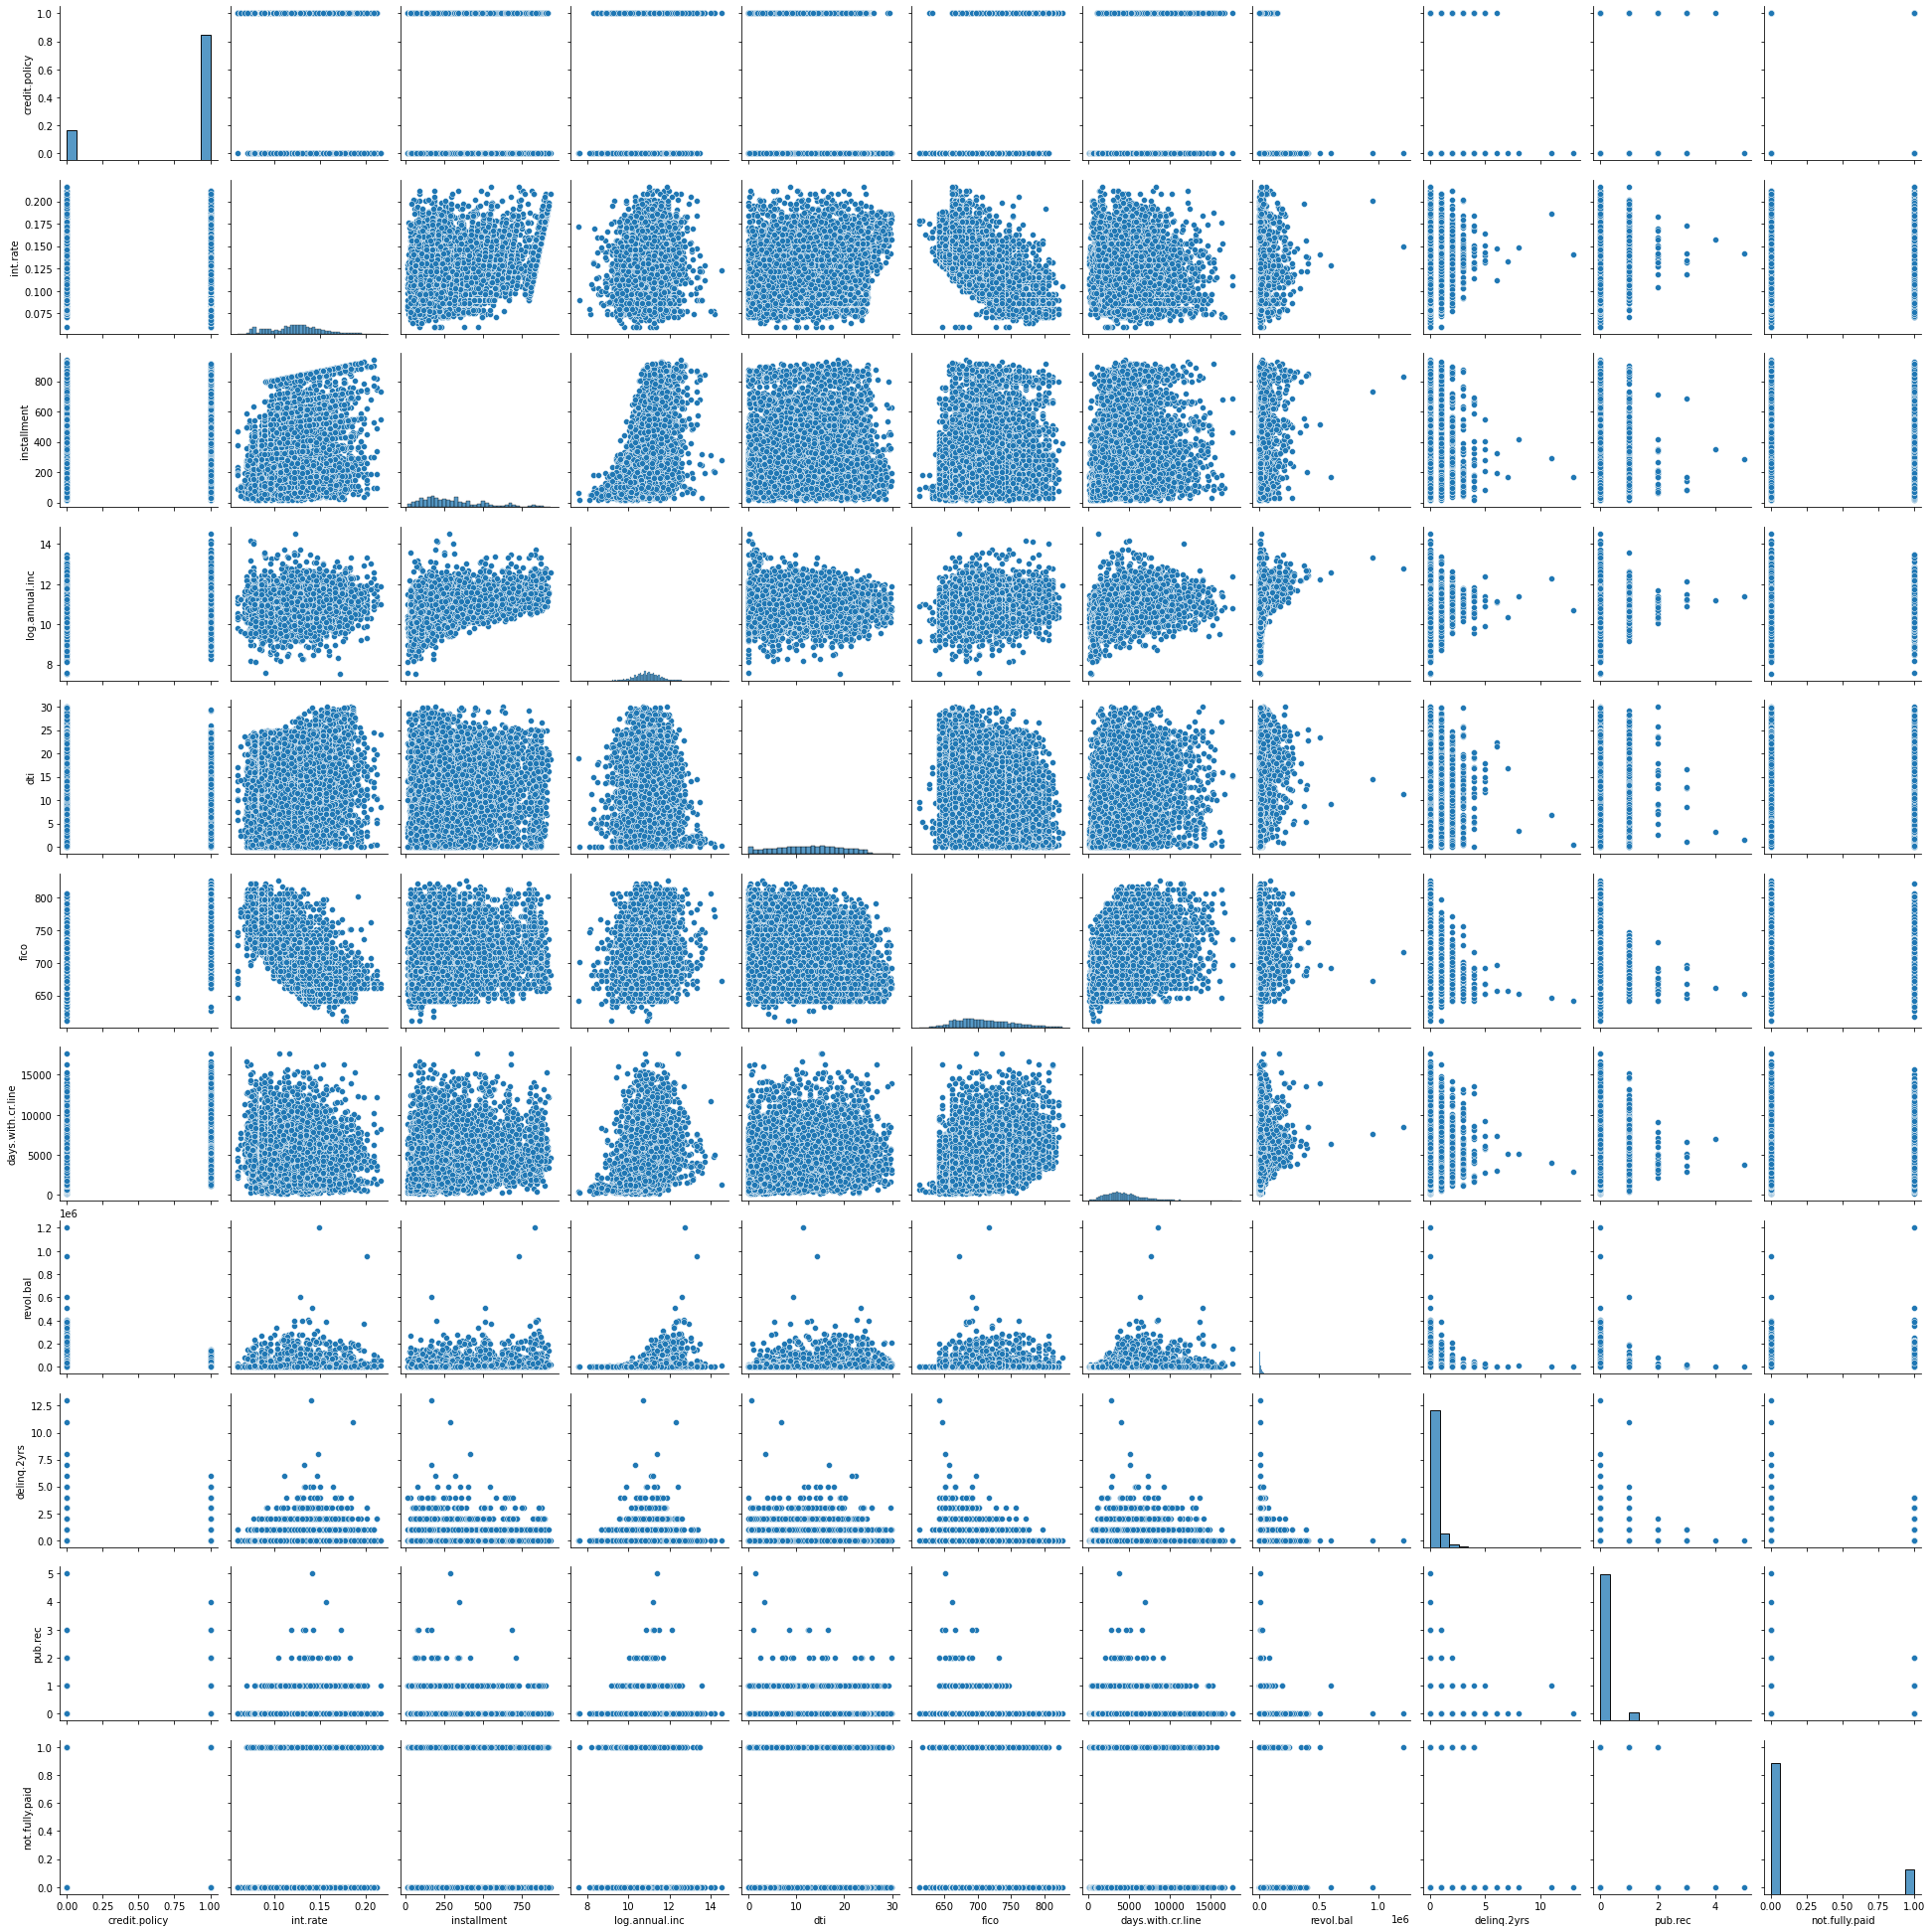

In [44]:
sns.pairplot(dt)

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
df_num = dt.select_dtypes(exclude = "object")

In [47]:
df_cat = dt.select_dtypes(include="object")

In [48]:
df_cat.head()

,purpose
0,debt_consolidation
1,credit_card
2,debt_consolidation
3,debt_consolidation
4,credit_card


In [50]:
le = LabelEncoder()
df_le = df_cat.apply(le.fit_transform)

In [51]:
df_le.head()

,purpose
0,2
1,1
2,2
3,2
4,1


In [52]:
df_num["purpose"] = df_le

In [53]:
df_num.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,delinq.2yrs,pub.rec,not.fully.paid,purpose
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,0,0,0,2
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,0,0,0,1
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,0,0,0,2
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,0,0,0,2
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,1,0,0,1


In [63]:
df_num["not.fully.paid"].value_counts(normalize= True)*100

0    83.994571
1    16.005429
Name: not.fully.paid, dtype: float64

In [57]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [60]:
x= df_num.drop(labels = ['not.fully.paid'],axis = 1)
y = df_num["not.fully.paid"]

In [61]:
x.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,delinq.2yrs,pub.rec,purpose
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,0,0,2
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,0,0,1
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,0,0,2
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,0,0,2
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,1,0,1


In [62]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.15,random_state =40)

In [65]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8141, 11), (1437, 11), (8141,), (1437,))

In [67]:
y_train.value_counts(normalize= True)*100

0    84.092863
1    15.907137
Name: not.fully.paid, dtype: float64

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU,Dropout,ELU

In [72]:
classifier = Sequential()

In [73]:
classifier.add(Dense(units=11,activation = 'relu'))

In [74]:
classifier.add(Dense(units=7,activation = 'relu'))

In [75]:
classifier.add(Dense(units=6,activation = 'relu'))

In [76]:
classifier.add(Dense(1,activation = 'sigmoid'))

In [77]:
classifier.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [78]:
model = classifier.fit(x_train,y_train,validation_split=0.33,batch_size= 10,epochs= 30)

Epoch 1/30
546/546 [==============================] - 3s 3ms/step - loss: 77.3243 - accuracy: 0.7325 - val_loss: 0.5575 - val_accuracy: 0.8362
Epoch 2/30
546/546 [==============================] - 1s 2ms/step - loss: 0.5452 - accuracy: 0.8302 - val_loss: 0.4889 - val_accuracy: 0.8381
Epoch 3/30
546/546 [==============================] - 1s 2ms/step - loss: 0.4946 - accuracy: 0.8335 - val_loss: 0.4668 - val_accuracy: 0.8415
Epoch 4/30
546/546 [==============================] - 1s 2ms/step - loss: 0.4647 - accuracy: 0.8365 - val_loss: 0.4554 - val_accuracy: 0.8411
Epoch 5/30
546/546 [==============================] - 1s 2ms/step - loss: 0.4550 - accuracy: 0.8374 - val_loss: 0.4421 - val_accuracy: 0.8422
Epoch 6/30
546/546 [==============================] - 1s 2ms/step - loss: 0.4466 - accuracy: 0.8379 - val_loss: 0.4376 - val_accuracy: 0.8437
Epoch 7/30
546/546 [==============================] - 1s 2ms/step - loss: 0.4437 - accuracy: 0.8381 - val_loss: 0.4343 - val_accuracy: 0.8441
Epoch

In [79]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

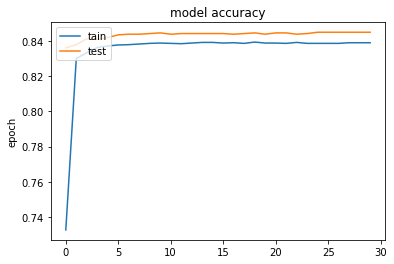

In [82]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylabel('epoch')
plt.legend(['tain','test'],loc = 'upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

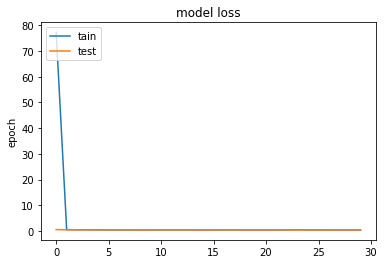

In [83]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.ylabel('epoch')
plt.legend(['tain','test'],loc = 'upper left')
plt.show

In [84]:
pred = classifier.predict(x_test)
pred = (pred >= 0.5)

45/45 [==============================] - 0s 1ms/step


In [85]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,pred)

array([[1199,    0],
       [ 238,    0]], dtype=int64)

In [86]:
accuracy_score(y_test,pred)

0.8343771746694503